<a href="https://colab.research.google.com/github/Stone1994G/Machine-Learning/blob/master/NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Stone Gulliksen
ID: 1214537883

## Using Keras to Build and Train Neural Networks

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In this exercise we will use a neural network to predict diabetes using the Pima Diabetes Dataset.  We will start by training a Random Forest to get a performance baseline.  Then we will use the Keras package to quickly build and train a neural network and compare the performance.  We will see how different network structures affect the performance, training time, and level of overfitting (or underfitting).

## UCI Pima Diabetes Dataset

* UCI ML Repositiory (http://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes)


### Attributes: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

The UCI Pima Diabetes Dataset which has 8 numerical predictors and a binary outcome.

In [ ]:
#Preliminaries

from __future__ import absolute_import, division, print_function  # Python 2/3 compatibility

import warnings
warnings.filterwarnings("ignore")


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# import seaborn as sns

%matplotlib inline

In [ ]:
## Import Keras objects for Deep Learning
from keras.models  import Sequential, K
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Using TensorFlow backend.


load variable in


In [ ]:
## Load in the data set 
file = "/content/drive/My Drive/data/pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin", 
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(file, names=names, skiprows=9)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# diabetes_df = pd.read_csv('/content/drive/My Drive/pima-indians-diabetes.csv', names=names, skiprows=9)

In [ ]:
# Take a peek at the data
print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
137,0,93,60,25,92,28.7,0.532,22,0
505,10,75,82,0,0,33.3,0.263,38,0
322,0,124,70,20,0,27.4,0.254,36,1
168,4,110,66,0,0,31.9,0.471,29,0
207,5,162,104,0,0,37.7,0.151,52,1


In [ ]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

In [ ]:
# Split the data to Train, and Test (75%, 25%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=494)

In [ ]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Above, we see that about 35% of the patients in this dataset have diabetes, while 65% do not.  This means we can get an accuracy of 65% without any model - just declare that no one has diabetes. We will calculate the ROC-AUC score to evaluate performance of our model, and also look at the accuracy as well to see if we improved upon the 65% accuracy.
## Exercise: Get a baseline performance using Random Forest
To begin, and get a baseline for classifier performance:
1. Train a Random Forest model with 200 trees on the training data.
2. Calculate the accuracy and roc_auc_score of the predictions.

__Note:__ AUROC is a figure for comparing **false positive rate** to **true positive rate**. To know more about how to calculate AUROC refer to __[here](https://stats.stackexchange.com/questions/132777/what-does-auc-stand-for-and-what-is-it)__.


In [ ]:
## Train the RF Model
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Make predictions on the test set - both "hard" predictions, and the scores (percent of trees voting yes)

# predict(X) -> Predict class for X.
# predict_proba(X) -> Predict class probabilities for X.

y_pred_class_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)

# Below two results should be equal for big data sets.
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_rf)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rf[:,1])))

accuracy is 0.714
roc-auc is 0.774


Below code will generate AUROC plot for the random forest prediction result.<br>
The **Accuracy** in AUROC is measured by the area under the ROC curve. An area of 1 represents a perfect test; an area of .5 represents a worthless. <br>
The x axis is the **False positive rate (FPR)** and the y axis is the **True positive rate (TPR)**. Check this __[Ref](http://gim.unmc.edu/dxtests/roc3.htm)__ for more details.

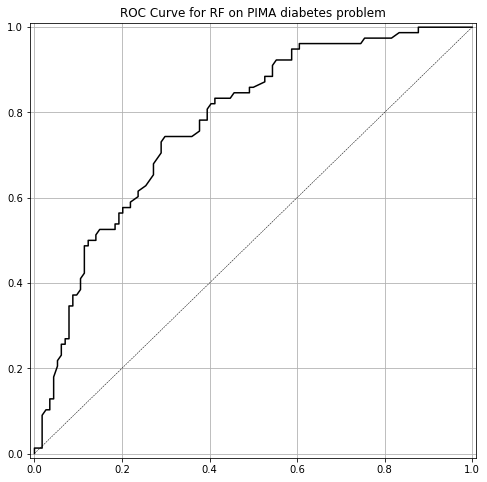

In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])


plot_roc(y_test, y_pred_prob_rf[:, 1], 'RF')

## Build a Single Hidden Layer Neural Network

We will use the Sequential model to quickly build a neural network.  Our first network will be a single layer network.  We have 8 variables, so we set the input shape to 8.  Let's start by having a single hidden layer with 12 nodes.

In [ ]:
## First let's normalize the data
## This aids the training of neural nets by providing numerical stability
## The StandardScaler assumes your data is normally distributed within each feature and will scale them such 
## that the distribution is now centred around 0, with a standard deviation of 1.


normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [ ]:
# Define the Model 
# Input size is 8-dimensional
# 1 hidden layer, 12 hidden nodes, sigmoid activation
# Final layer has just one node with a sigmoid activation (standard for binary classification)

model_1 = Sequential([
    Dense(12, input_shape=(8,), activation="sigmoid"),
    Dense(1, activation="sigmoid")
])

In [ ]:
# Use the summary function. It is a nice tool to view the model you have created and count the parameters.
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


### Comprehension question:
Why do we have 121 parameters?  Does that make sense?


Let's fit our model for 200 epochs.

In [ ]:
# Fit(Train) the Model
# Compile the model with Optimizer, Loss Function and Metrics
# the fit function returns the run history. 
# It is very convenient, as it contains information about the model fit, iterations etc.

model_1.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)

Train on 576 samples, validate on 192 samples
Epoch 1/200
576/576 [==============================] - 0s 593us/step - loss: 0.6661 - accuracy: 0.6701 - val_loss: 0.7379 - val_accuracy: 0.5938
Epoch 2/200
576/576 [==============================] - 0s 46us/step - loss: 0.6649 - accuracy: 0.6701 - val_loss: 0.7366 - val_accuracy: 0.5938
Epoch 3/200
576/576 [==============================] - 0s 46us/step - loss: 0.6638 - accuracy: 0.6701 - val_loss: 0.7353 - val_accuracy: 0.5938
Epoch 4/200
576/576 [==============================] - 0s 43us/step - loss: 0.6627 - accuracy: 0.6701 - val_loss: 0.7340 - val_accuracy: 0.5938
Epoch 5/200
576/576 [==============================] - 0s 44us/step - loss: 0.6616 - accuracy: 0.6701 - val_loss: 0.7328 - val_accuracy: 0.5938
Epoch 6/200
576/576 [==============================] - 0s 46us/step - loss: 0.6604 - accuracy: 0.6701 - val_loss: 0.7316 - val_accuracy: 0.5938
Epoch 7/200
576/576 [==============================] - 0s 47us/step - loss: 0.6593 - accu

In [ ]:
## Like we did for the Random Forest, Generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 = model_1.predict_classes(X_test_norm)
y_pred_prob_nn_1 = model_1.predict(X_test_norm)

In [ ]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

In [ ]:
y_pred_prob_nn_1[:10]

array([[0.4519827 ],
       [0.22388902],
       [0.25372946],
       [0.38068518],
       [0.24971509],
       [0.11758208],
       [0.3836403 ],
       [0.18762037],
       [0.1890142 ],
       [0.20227927]], dtype=float32)

accuracy is 0.630
roc-auc is 0.690


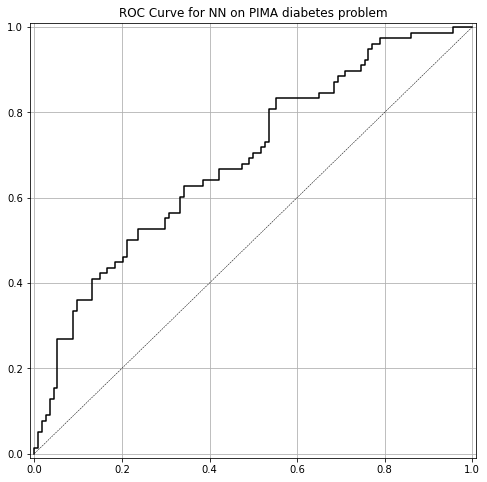

In [ ]:
# Print model performance and plot the roc curve
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

There may be some variation in exact numbers due to randomness, but you should get results in the same ballpark as the Random Forest - between 75% and 85% accuracy, between .8 and .9 for AUC.

Let's look at the `run_hist_1` object that was created, specifically its `history` attribute.

In [ ]:
run_hist_1.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

Let's plot the training loss and the validation loss over the different epochs and see how it looks.

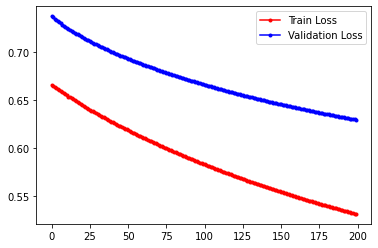

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

Looks like the losses are still going down on both the training set and the validation set.  This suggests that the model might benefit from further training.  Let's train the model a little more and see what happens. Note that it will pick up from where it left off. Train for 1000 more epochs.

In [ ]:
## Note that when we call "fit" again, it picks up where it left off
run_hist_1b = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1000)

Train on 576 samples, validate on 192 samples
Epoch 1/1000
576/576 [==============================] - 0s 65us/step - loss: 0.5308 - accuracy: 0.7361 - val_loss: 0.6294 - val_accuracy: 0.6302
Epoch 2/1000
576/576 [==============================] - 0s 50us/step - loss: 0.5304 - accuracy: 0.7344 - val_loss: 0.6291 - val_accuracy: 0.6302
Epoch 3/1000
576/576 [==============================] - 0s 45us/step - loss: 0.5300 - accuracy: 0.7361 - val_loss: 0.6288 - val_accuracy: 0.6354
Epoch 4/1000
576/576 [==============================] - 0s 43us/step - loss: 0.5296 - accuracy: 0.7378 - val_loss: 0.6285 - val_accuracy: 0.6458
Epoch 5/1000
576/576 [==============================] - 0s 45us/step - loss: 0.5291 - accuracy: 0.7396 - val_loss: 0.6282 - val_accuracy: 0.6510
Epoch 6/1000
576/576 [==============================] - 0s 44us/step - loss: 0.5287 - accuracy: 0.7413 - val_loss: 0.6280 - val_accuracy: 0.6510
Epoch 7/1000
576/576 [==============================] - 0s 52us/step - loss: 0.5283 

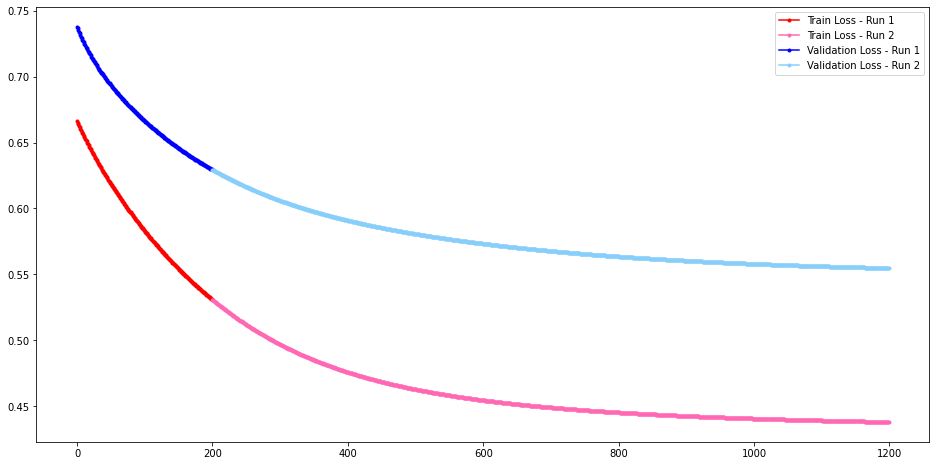

In [ ]:
n = len(run_hist_1.history["loss"])
m = len(run_hist_1b.history['loss'])
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(range(n), run_hist_1.history["loss"],'r', marker='.', label="Train Loss - Run 1")
ax.plot(range(n, n+m), run_hist_1b.history["loss"], 'hotpink', marker='.', label="Train Loss - Run 2")

ax.plot(range(n), run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss - Run 1")
ax.plot(range(n, n+m), run_hist_1b.history["val_loss"], 'LightSkyBlue', marker='.',  label="Validation Loss - Run 2")

ax.legend()

Note that this graph begins where the other left off.  While the training loss is still going down, it looks like the validation loss has stabilized (or even gotten worse!).  This suggests that our network will not benefit from further training.  What is the appropriate number of epochs?

## Question

Do the following in the cells below:
- Build a model with two hidden layers, each with 6 nodes
- Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
- Use a learning rate of .003 and train for 1500 epochs
- Graph the trajectory of the loss functions, accuracy on both train and test set
- Plot the roc curve for the predictions

## Your Answer

In [ ]:
# Model 2 with two hidden layers with 6 nodes each with the relu activation function
# Final Layer is sigmoid
model_2 = Sequential([
    Dense(6, activation="relu"),
    Dense(6, activation="relu"),
    Dense(1, activation="sigmoid")
    
])

# Compile model with learning rate .003 with a train size of 1500 epochs
model_2.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_2 = model_2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)



Train on 576 samples, validate on 192 samples
Epoch 1/1500
576/576 [==============================] - 0s 180us/step - loss: 0.7084 - accuracy: 0.3333 - val_loss: 0.7082 - val_accuracy: 0.4010
Epoch 2/1500
576/576 [==============================] - 0s 48us/step - loss: 0.7052 - accuracy: 0.3733 - val_loss: 0.7058 - val_accuracy: 0.4219
Epoch 3/1500
576/576 [==============================] - 0s 45us/step - loss: 0.7021 - accuracy: 0.4149 - val_loss: 0.7035 - val_accuracy: 0.4219
Epoch 4/1500
576/576 [==============================] - 0s 44us/step - loss: 0.6991 - accuracy: 0.4514 - val_loss: 0.7014 - val_accuracy: 0.4479
Epoch 5/1500
576/576 [==============================] - 0s 53us/step - loss: 0.6963 - accuracy: 0.4913 - val_loss: 0.6993 - val_accuracy: 0.5208
Epoch 6/1500
576/576 [==============================] - 0s 49us/step - loss: 0.6935 - accuracy: 0.5312 - val_loss: 0.6974 - val_accuracy: 0.5208
Epoch 7/1500
576/576 [==============================] - 0s 52us/step - loss: 0.6909

Graph the trajectory of the loss functions, accuracy on both train and test set


In [ ]:
run_hist_2.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

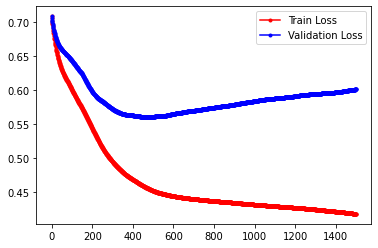

In [ ]:
# Graph the trajectory of the loss functions, accuracy on both train and test set
fig, ax = plt.subplots()
ax.plot(run_hist_2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()


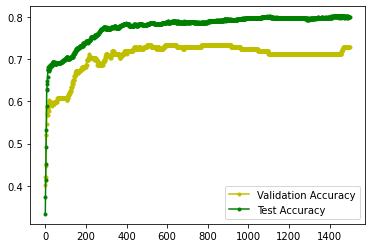

In [ ]:
fig, ax = plt.subplots()

ax.plot(run_hist_2.history["val_accuracy"],'y', marker='.', label="Validation Accuracy")
ax.plot(run_hist_2.history["accuracy"],'g', marker='.', label="Test Accuracy")
ax.legend()

Plot the roc curve for the predictions

accuracy is 0.729
roc-auc is 0.758


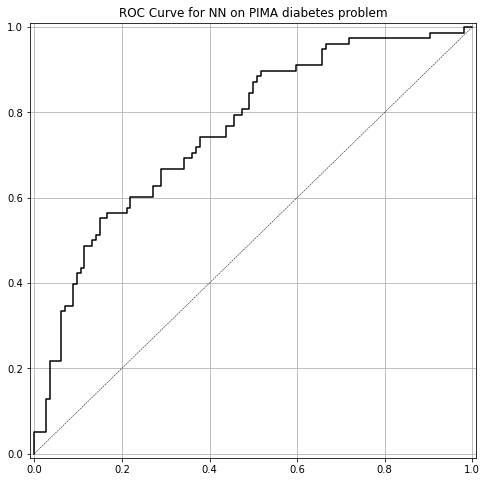

In [ ]:
# Plot the roc curve for the predictions
y_pred_class_nn_2 = model_2.predict_classes(X_test_norm)
y_pred_prob_nn_2 = model_2.predict(X_test_norm)

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_2)))

plot_roc(y_test, y_pred_prob_nn_2, 'NN')